In [1]:
import gym
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Q_Agent:
    def __init__(self, max_episodes, max_steps, test_episodes, alpha, gamma, epsilon, decay_rate):
        self.env = gym.make("Taxi-v3", render_mode = "rgb_array")
        self.qtable = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        self.max_episodes = max_episodes
        self.test_episodes= test_episodes
        self.steps = max_steps
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.reward_arr = np.empty(max_episodes)
        self.decay_rate = decay_rate
        
        
    def run(self):
        print("Training....")
        for episode in range(self.max_episodes):
#             print("Episode: {}".format(episode))
            state = self.env.reset()
            done = False
            eps_reward = 0
            
            for step in range(self.steps):
                exp_exp_tradeoff = random.uniform(0,1)
                if exp_exp_tradeoff > self.epsilon:
                    if type(state) == tuple:
                        action = np.argmax(self.qtable[state[0],:])
                    else:
                        action = np.argmax(self.qtable[state,:])
                
                else:
                    action = self.env.action_space.sample()
                
                new_state, reward, done, info, _ = self.env.step(action)
                eps_reward += reward
#                 print("reward: {}".format(reward))
                if type(state) == tuple:
                    self.qtable[state[0], action] = self.qtable[state[0], action] + self.alpha * (reward + self.gamma * 
                                            np.max(self.qtable[new_state, :]) - self.qtable[state[0], action])
                else:
                    self.qtable[state, action] = self.qtable[state, action] + self.alpha * (reward + self.gamma * 
                                            np.max(self.qtable[new_state, :]) - self.qtable[state, action])
                    
                state = new_state

                if done == True: 
                    self.reward_arr[episode] = eps_reward
                    eps_reward = 0
                    break
                self.reward_arr[episode] = eps_reward
            eps_reward = 0
        
        # Reduce epsilon (because we need less and less exploration)
            self.epsilon = 0.01 + (1.0 - 0.01)*np.exp(-self.decay_rate*episode) 
            
        print("Learning done!")
        
    
            
        
        
    def plot_rewards(self):

        plt.title("Total Reward per episodes")
        plt.xlabel("episode")
        plt.ylabel("reward")
        plt.ylim(-400, 20)
        plt.grid()
        plt.plot(self.reward_arr, "-r")
        plt.show()     
        
    def info_rewards(self):
        print("Max reward: {}".format(max(self.reward_arr)))
        print("Min reward: {}".format(min(self.reward_arr)))
        print("Avg reward: {}".format(sum(self.reward_arr)/self.max_episodes))

    

Training....
Learning done!


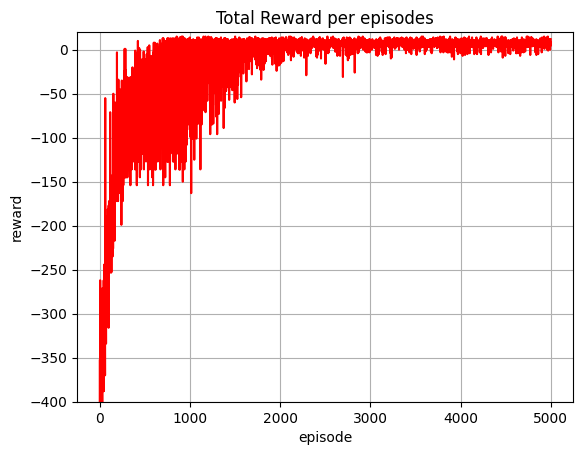

In [3]:
agent = Q_Agent(max_episodes = 5000, 
                max_steps = 100, 
                test_episodes = 1000, 
                alpha = 0.1, 
                gamma = 0.95, 
                epsilon = 1.0, 
                decay_rate = 0.01)
agent.run()
agent.plot_rewards()

In [118]:
class SarsaAgent:
    
    def __init__(self, max_episodes, max_steps, test_episodes, alpha, gamma, epsilon, decay_rate):
        self.env = gym.make("Taxi-v3", render_mode = "rgb_array")
        self.max_steps = max_steps
        self.max_episodes = max_episodes
        self.steps = max_steps
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay_rate = decay_rate
        self.reward_list= np.empty(max_episodes)
        self.Q = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        return
        
    def chooseAction(self,state):
        action = 0
        if np.random.uniform(0,1) <self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = np.argmax(self.Q[state,:])
        return action
    
    def updateQ(self, state, action, state1, action1, reward):
        currentQ = self.Q[state,action]
        self.Q[state,action] = currentQ + float(self.alpha *( reward + (self.gamma *self.Q[state1,action1]) - currentQ))
        
    def training(self):

        for eps in range(self.max_episodes):
            state = self.env.reset()
            action1 = self.chooseAction(state[0])
            eps_reward = 0
            
            for step in range(self.max_steps):
                
                
                #take action 
                new_state, reward, done, info, _ = self.env.step(action1)
                
                #get next action
                action2 = self.chooseAction(new_state)
                        
                #Update Q table with next action
                if type(state) == tuple:
                    self.updateQ(state[0],action1, new_state , action2, reward)
                    
                else: 
                    self.updateQ(state,action1,new_state, action2, reward)
                
                #keep track of reward
                eps_reward+=reward
                
                #overwrite state and action value
                state = new_state
                action1 = action2
                
                if done:
                    break
            self.epsilon = 0.01 + (1.0 - 0.01)*np.exp(-self.decay_rate*eps) 
            self.reward_list[eps]= eps_reward
            print(f"ep : {eps} , reward : {eps_reward}")
            eps_reward = 0
            
    def plot_result(self):
        
        plt.title("Total Reward per episodes")
        plt.xlabel("episode")
        plt.ylabel("reward")
        plt.ylim(-400, 20)
        plt.grid()
        plt.plot(self.reward_list, "-r")
        plt.show()  
        
    def export_csv(self):
        df = pd.dataFrame(self.Q)
        df.to_csv("sarsa_rewards.csv",index = False)

                
                

            
        
        

In [119]:
agent = SarsaAgent(max_episodes = 1000, 
                max_steps = 200, 
                test_episodes = 1000, 
                alpha = 0.1, 
                gamma = 0.95, 
                epsilon = 1.0, 
                decay_rate = 0.01)

In [120]:
agent.training()

ep : 0 , reward : -740
ep : 1 , reward : -785
ep : 2 , reward : -830
ep : 3 , reward : -857
ep : 4 , reward : -758
ep : 5 , reward : -857
ep : 6 , reward : -884
ep : 7 , reward : -749
ep : 8 , reward : -803
ep : 9 , reward : -812
ep : 10 , reward : -758
ep : 11 , reward : -722
ep : 12 , reward : -740
ep : 13 , reward : -785
ep : 14 , reward : -776
ep : 15 , reward : -704
ep : 16 , reward : -713
ep : 17 , reward : -485
ep : 18 , reward : -713
ep : 19 , reward : -749
ep : 20 , reward : -695
ep : 21 , reward : -758
ep : 22 , reward : -731
ep : 23 , reward : -731
ep : 24 , reward : -650
ep : 25 , reward : -704
ep : 26 , reward : -758
ep : 27 , reward : -776
ep : 28 , reward : -641
ep : 29 , reward : -659
ep : 30 , reward : -713
ep : 31 , reward : -677
ep : 32 , reward : -668
ep : 33 , reward : -641
ep : 34 , reward : -551
ep : 35 , reward : -484
ep : 36 , reward : -668
ep : 37 , reward : -641
ep : 38 , reward : -668
ep : 39 , reward : -596
ep : 40 , reward : -632
ep : 41 , reward : -605
ep

ep : 390 , reward : 5
ep : 391 , reward : -51
ep : 392 , reward : -133
ep : 393 , reward : 13
ep : 394 , reward : -9
ep : 395 , reward : -209
ep : 396 , reward : -42
ep : 397 , reward : -144
ep : 398 , reward : -77
ep : 399 , reward : -48
ep : 400 , reward : 10
ep : 401 , reward : -100
ep : 402 , reward : 11
ep : 403 , reward : -43
ep : 404 , reward : -3
ep : 405 , reward : -10
ep : 406 , reward : -72
ep : 407 , reward : -205
ep : 408 , reward : -49
ep : 409 , reward : 12
ep : 410 , reward : -38
ep : 411 , reward : -110
ep : 412 , reward : -148
ep : 413 , reward : -162
ep : 414 , reward : -42
ep : 415 , reward : -144
ep : 416 , reward : -72
ep : 417 , reward : -6
ep : 418 , reward : -15
ep : 419 , reward : -7
ep : 420 , reward : -17
ep : 421 , reward : -164
ep : 422 , reward : -236
ep : 423 , reward : -82
ep : 424 , reward : -78
ep : 425 , reward : -63
ep : 426 , reward : -47
ep : 427 , reward : 15
ep : 428 , reward : -66
ep : 429 , reward : -125
ep : 430 , reward : 12
ep : 431 , rewar

ep : 831 , reward : -24
ep : 832 , reward : -54
ep : 833 , reward : -95
ep : 834 , reward : -3
ep : 835 , reward : -43
ep : 836 , reward : 11
ep : 837 , reward : -34
ep : 838 , reward : -31
ep : 839 , reward : 6
ep : 840 , reward : 14
ep : 841 , reward : -17
ep : 842 , reward : -73
ep : 843 , reward : -33
ep : 844 , reward : 10
ep : 845 , reward : 10
ep : 846 , reward : 0
ep : 847 , reward : -41
ep : 848 , reward : 1
ep : 849 , reward : -53
ep : 850 , reward : 5
ep : 851 , reward : -66
ep : 852 , reward : -53
ep : 853 , reward : 14
ep : 854 , reward : -51
ep : 855 , reward : -53
ep : 856 , reward : -10
ep : 857 , reward : -29
ep : 858 , reward : 4
ep : 859 , reward : -47
ep : 860 , reward : 11
ep : 861 , reward : 13
ep : 862 , reward : -30
ep : 863 , reward : 12
ep : 864 , reward : -23
ep : 865 , reward : 1
ep : 866 , reward : 8
ep : 867 , reward : 15
ep : 868 , reward : -12
ep : 869 , reward : -64
ep : 870 , reward : -4
ep : 871 , reward : 10
ep : 872 , reward : 9
ep : 873 , reward : 

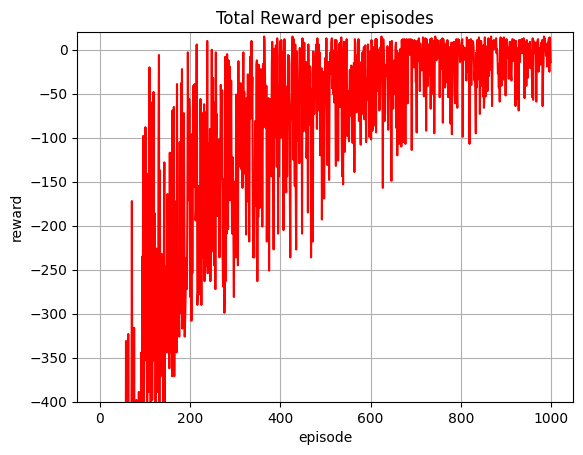

In [121]:
agent.plot_result()

In [122]:
agent.export_csv()

AttributeError: module 'pandas' has no attribute 'dataFrame'